# Sort cutouts using their predicted values

## Import the necessary functions

In [2]:
import tensorflow as tf
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import json
from PIL import Image

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

## Load the model

In [6]:
model_path = '/home/rogerc8/model_files/new_VISp1.h5'
model = load_model(model_path)
model.layers[-1].activation = tf.keras.activations.linear

## Create a list of file paths of the cutouts

In [10]:
cutout_path = Path('/home/xinmeix/ml_cutouts/cleaned_cutout')

In [11]:
img_list = []
for img in cutout_path.iterdir():
    img_list.append(str(img))

## Convert cutout images to arrays for prediction

In [12]:
img_size = (96,96)
img_array_list = []
for img_path in img_list:
    img = load_img(img_path, target_size=img_size, color_mode='grayscale')  # Load the image in grayscale
    img_array = img_to_array(img)  # Convert to array without re-normalizing
    img_array_list.append(img_array)

## Predict in batches

In [13]:
pred_list = []
batch_size = 10000

for i in range(0, len(img_array_list), batch_size):
    batch_input = np.array(img_array_list[i:i+batch_size])
    prediction = model.predict(batch_input)
    pred_list.extend(prediction)
    if i%100000 == 0:
        print(f'Predicted: {i}/496554')

I0000 00:00:1735589481.315829 3649366 service.cc:148] XLA service 0x7f07fc005270 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735589481.315870 3649366 service.cc:156]   StreamExecutor device (0): NVIDIA TITAN Xp, Compute Capability 6.1
I0000 00:00:1735589481.315878 3649366 service.cc:156]   StreamExecutor device (1): NVIDIA TITAN Xp, Compute Capability 6.1
I0000 00:00:1735589481.315884 3649366 service.cc:156]   StreamExecutor device (2): NVIDIA TITAN Xp, Compute Capability 6.1
2024-12-30 12:11:21.337150: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1735589481.394424 3649366 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-30 12:11:22.214376: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[32,128,32,32]{3,2,1,0}, u8[0]{0

 20/313 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step 

I0000 00:00:1735589482.779382 3649366 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

2024-12-30 12:11:25.472420: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[16,128,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,64,32,32]{3,2,1,0}, f32[128,64,5,5]{3,2,1,0}, f32[128]{0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2024-12-30 12:11:25.563692: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[16,256,16,16]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,128,16,16]{3,2,1,0}, f32[256,128,3,3]{3,2,1,0}, f32[256]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationF

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step
Predicted: 0/496554
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Predicted: 100000/496554
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Predicted: 200000/496554
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━

2024-12-30 12:13:58.561855: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[26,128,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[26,64,32,32]{3,2,1,0}, f32[128,64,5,5]{3,2,1,0}, f32[128]{0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2024-12-30 12:13:58.688235: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[26,256,16,16]{3,2,1,0}, u8[0]{0}) custom-call(f32[26,128,16,16]{3,2,1,0}, f32[256,128,3,3]{3,2,1,0}, f32[256]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationF

205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step


## Relate file paths with their predicted values 

In [14]:
ranked_cutout = []
for i,pred in enumerate(pred_list):
    item = (img_list[i],round(float(pred),6))
    ranked_cutout.append(item)

/tmp/ipykernel_3648954/657888700.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  item = (img_list[i],round(float(pred),6))


In [15]:
ranked_cutout = sorted(ranked_cutout, key=lambda x: x[1], reverse=True)

In [16]:
with open('sorted.txt','w') as file:
    json.dump(ranked_cutout, file)

## Visualize ranked cutouts with cutomized index

In [18]:
pred_value = [t[1] for t in ranked_cutout]
img_path_list = [t[0] for t in ranked_cutout]

In [21]:
visl_start = 100
visl_end = 164
# Create figure with more space at the top for the title
fig, axes = plt.subplots(8, 8, figsize=(80, 85))
plt.subplots_adjust(top=0.93)  # Make room for title at the top
fig.suptitle(f"{visl_start} to {visl_end}th cutouts with highest prediction values", 
             fontsize=100, 
             weight='bold', 
             y=0.98)  # Position the title higher

# Loop through images and axes to display
for ax, img_path, value in zip(axes.ravel(), img_path_list[visl_start:visl_end], pred_value[visl_start:visl_end]):
    img = Image.open(img_path)
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.text(
        0.95, 0.05,
        f"{value:.2e}",
        color='white',
        fontsize=50,
        weight='bold',
        ha='right',
        va='bottom',
        transform=ax.transAxes,
        bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.2')
    )

# Add more space between subplots
plt.tight_layout(pad=5.0)  # Increase padding between subplots

plt.show()

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([-4100., -4099., -4098., ...,  3197.,  3198.,  3199.]),
 <BarContainer object of 7299 artists>)

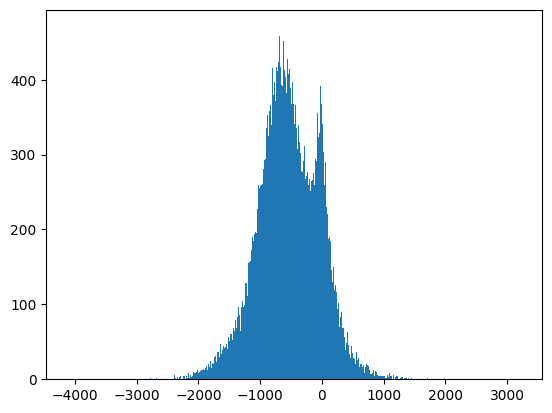

In [28]:
bins = np.arange(-4100,3200,1)
plt.hist(pred_value,bins=bins)